### Data@ANZ Virtual Internship
#### Kaarthik Andavar

In [141]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
df.shape

(12043, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [8]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [9]:
df['account'].nunique()

100

In [10]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

### DATA CLEANING

In [12]:
replace_missing = round((df.isnull().mean())*100,2).sort_values(ascending=False)
replace_missing

merchant_code        92.67
bpay_biller_code     92.65
card_present_flag    35.92
merchant_state       35.92
merchant_suburb      35.92
merchant_id          35.92
merchant_long_lat    35.92
movement              0.00
first_name            0.00
account               0.00
currency              0.00
long_lat              0.00
txn_description       0.00
date                  0.00
balance               0.00
gender                0.00
age                   0.00
extraction            0.00
amount                0.00
transaction_id        0.00
country               0.00
customer_id           0.00
status                0.00
dtype: float64

In [13]:
df[['customer_long','customer_lat']] = df.long_lat.str.split(" ",expand=True,)

In [14]:
df[['merchant_long','merchant_lat']] = df.merchant_long_lat.str.split(" ",expand=True,)

In [15]:
df[['extraction_date','time']] = df.extraction.str.split("T",expand=True,)

In [16]:
df['time'] = pd.to_timedelta(df['time'])

In [18]:
df['extraction'] =  pd.to_datetime(df['extraction'])#,format='%d%b%Y:%H:%M:%S.%f')

In [19]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,customer_long,customer_lat,merchant_long,merchant_lat,extraction_date,time
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,153.38,-27.99,2018-08-01,01:01:15
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,151.21,-33.87,2018-08-01,01:13:45
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,151.21,-33.87,2018-08-01,01:26:15
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,153.05,-26.68,2018-08-01,01:38:45
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,153.44,-28.06,2018-08-01,01:51:15


In [20]:
df['date'] =  pd.to_datetime(df['date'], format = '%d%m%y')

In [21]:
sorted(df.age.unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 50,
 52,
 53,
 64,
 69,
 78]

In [22]:
# Drop unnecessary columns
df = df.drop(['bpay_biller_code', 'long_lat', 'merchant_code', 'merchant_long_lat', 'currency', 'status', 'extraction_date'], axis=1)

In [23]:
print(len(df.columns))

22


### EDA

In [24]:
# Number of Transactions
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
2018-08-03    157
2018-10-26    157
2018-08-24    156
2018-09-13    154
2018-10-12    154
2018-08-31    153
2018-08-23    152
2018-08-02    152
2018-09-07    152
2018-09-06    152
2018-08-10    151
2018-10-18    150
2018-08-22    150
2018-09-26    149
2018-09-05    149
2018-09-12    149
2018-08-09    149
2018-10-24    148
2018-09-19    148
2018-10-10    146
2018-09-20    146
2018-10-11    145
2018-08-15    144
2018-08-30    143
2018-10-28    143
2018-10-31    141
2018-08-08    141
2018-10-25    140
2018-10-27    139
2018-08-29    139
2018-10-14    138
2018-09-01    137
2018-08-01    137
2018-09-22    137
2018-10-13    137
2018-08-18    136
2018-10-21    133
2018-09-29    131
2018-08-11    131
2018-08-25    131
2018-10-06    130
2018-09-02    129
2018-09-08    129
2018-08-28    128
2018-09-15    127
2018-09-18

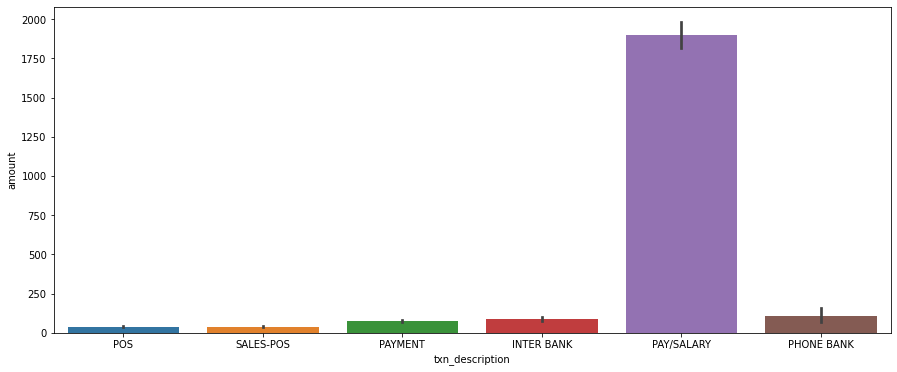

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x='txn_description', y='amount' ,data=df)

In [27]:
# Number of Transactions made by each customer

df.groupby(['first_name', 'customer_id']).count()['transaction_id'].sort_values(ascending=False)

first_name   customer_id   
Diana        CUS-2487424745    578
Michael      CUS-2142601169    303
Tonya        CUS-3026014945    292
Kimberly     CUS-3378712515    260
Rhonda       CUS-1614226872    259
Jessica      CUS-1196156254    245
Joseph       CUS-2695611575    239
Richard      CUS-51506836      239
Jeffrey      CUS-860700529     233
Tiffany      CUS-1669695324    230
Virginia     CUS-127297539     199
Michelle     CUS-883482547     178
Sandra       CUS-4142663097    174
Edward       CUS-443776336     170
James        CUS-4023861240    169
Susan        CUS-164374203     166
Craig        CUS-2663907001    165
Jessica      CUS-325142416     163
Ricky        CUS-3142625864    163
Jeffrey      CUS-1433879684    155
Joseph       CUS-537508723     152
Natasha      CUS-527400765     151
Ronald       CUS-2178051368    148
Charles      CUS-3336454548    145
Matthew      CUS-1790886359    144
Derek        CUS-3325710106    141
Christopher  CUS-3117610635    139
Christine    CUS-2376382098

In [28]:
# What is the average transactions each day?

df.groupby(['date']).count()['amount'].mean()

132.34065934065933

In [29]:
# What is the average transaction amount?

df['amount'].mean()

187.93358797641767

In [33]:
# what is the average balance ?

df['balance'].mean()

14704.195553433592

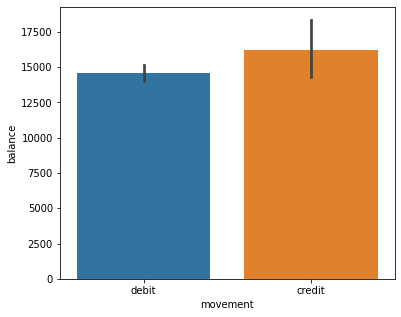

In [34]:
plt.figure(figsize=(6,5))
sns.barplot(x='movement', y='balance' ,data=df)

In [35]:
df['Month']=df['date'].dt.month
df.head()

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month
0,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,153.41,-27.95,153.38,-27.99,01:01:15,8
1,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95,151.21,-33.87,01:13:45,8
2,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,151.23,-33.94,151.21,-33.87,01:26:15,8
3,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66,153.05,-26.68,01:38:45,8
4,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95,153.44,-28.06,01:51:15,8


In [38]:
df_aug= df[df['Month']==8]
df_sep= df[df['Month']==9]
df_oct= df[df['Month']==10]

Text(0, 0.5, 'Freq')

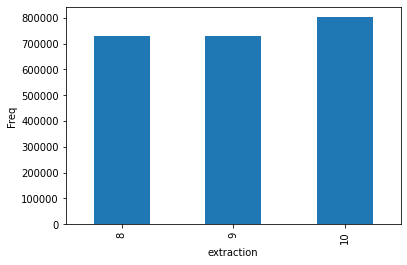

In [37]:
# How frequently the extraction is made with respect to each month 

df.amount.groupby(df["extraction"].dt.month).sum().plot(kind="bar")
plt.ylabel("Freq")

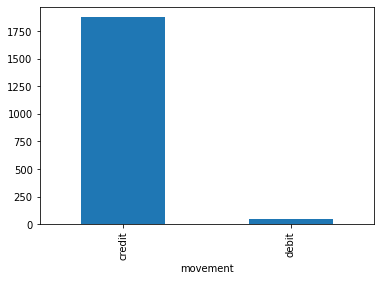

In [39]:
df.amount.groupby(df_aug["movement"]).mean().plot(kind='bar')

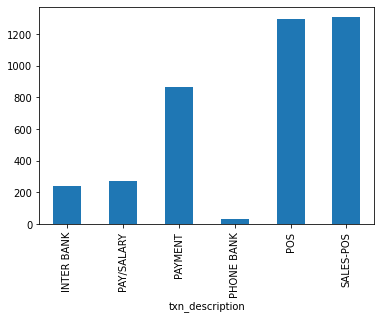

In [40]:
df.amount.groupby(df_sep["txn_description"]).count().plot(kind='bar')

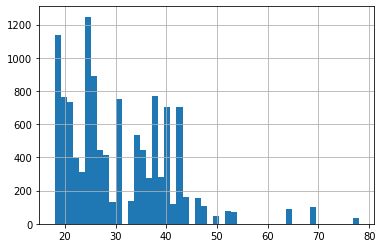

In [41]:
# checking with respect to age distribution

df['age'].hist(bins=50)

In [42]:
# Function to get date of month
def get_dom(date):
    return date.day

df['dom'] = df['date'].map(get_dom)
df.tail()

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month,dom
12038,0.0,ACC-3021093232,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06+00:00,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,debit,149.83,-29.47,145.23,-37.81,23:09:06,10,31
12039,1.0,ACC-1608363396,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46+00:00,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,debit,151.22,-33.87,150.88,-33.96,23:21:46,10,31
12040,1.0,ACC-3827517394,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25+00:00,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,debit,151.12,-33.89,150.92,-33.74,23:34:25,10,31
12041,1.0,ACC-2920611728,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05+00:00,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,debit,144.96,-37.76,145.09,-37.91,23:47:05,10,31
12042,1.0,ACC-1443681913,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,Ryan,5517.91,2018-10-31,M,31,Mascot,NSW,2018-10-31 23:59:44+00:00,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,debit,150.92,-33.77,151.19,-33.93,23:59:44,10,31


Text(0.5, 1.0, 'Number of Transcation w.r.t. dates of month')

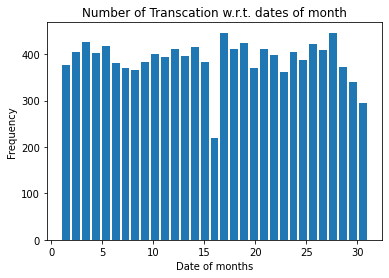

In [43]:
# Number of Transactions with respect to date
plt.hist(df.dom, bins = 31, rwidth = 0.8)
plt.xlabel("Date of months")                                        # Less number of transaction during month's end
plt.ylabel("Frequency")
plt.title("Number of Transcation w.r.t. dates of month")

In [44]:
#Function to gte weekday 

def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)
df.tail()

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month,dom,weekday
12038,0.0,ACC-3021093232,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06+00:00,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,debit,149.83,-29.47,145.23,-37.81,23:09:06,10,31,2
12039,1.0,ACC-1608363396,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46+00:00,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,debit,151.22,-33.87,150.88,-33.96,23:21:46,10,31,2
12040,1.0,ACC-3827517394,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25+00:00,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,debit,151.12,-33.89,150.92,-33.74,23:34:25,10,31,2
12041,1.0,ACC-2920611728,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05+00:00,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,debit,144.96,-37.76,145.09,-37.91,23:47:05,10,31,2
12042,1.0,ACC-1443681913,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,Ryan,5517.91,2018-10-31,M,31,Mascot,NSW,2018-10-31 23:59:44+00:00,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,debit,150.92,-33.77,151.19,-33.93,23:59:44,10,31,2


Text(0.5, 1.0, 'Number of Transcation w.r.t. weekdays')

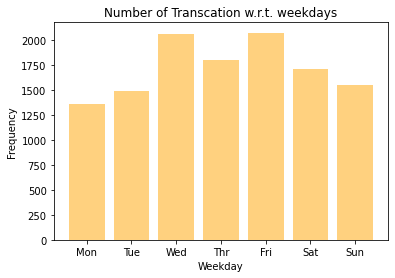

In [45]:
plt.hist(df.weekday, bins=7, range=(-0.5,6.5), alpha=0.5, color='orange', rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')                                                    # Maximum transcation on mid-days of week
plt.title('Number of Transcation w.r.t. weekdays')

### Time Series Analysis

In [47]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

In [48]:
df = df.set_index(df['date'])

In [54]:
df.head()

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month,dom,weekday,year,week_number,weekday_name
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,153.41,-27.95,153.38,-27.99,01:01:15,8,1,2,2018,31,Wednesday
2018-08-01,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95,151.21,-33.87,01:13:45,8,1,2,2018,31,Wednesday
2018-08-01,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,151.23,-33.94,151.21,-33.87,01:26:15,8,1,2,2018,31,Wednesday
2018-08-01,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66,153.05,-26.68,01:38:45,8,1,2,2018,31,Wednesday
2018-08-01,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95,153.44,-28.06,01:51:15,8,1,2,2018,31,Wednesday


In [56]:
df['year'] = df.index.year
df['week_number'] = df.index.week
df['weekday_name'] = df.index.day_name()
df['month_name'] = df.index.month_name()

In [57]:
# Number of transactions amount each month

df.groupby('month_name')['amount'].count()

month_name
August       3943
October      4087
September    4013
Name: amount, dtype: int64

In [58]:
# Monthly total amount 

df.groupby('month_name')['amount'].sum()

month_name
August       729935.52
October      802798.47
September    730550.21
Name: amount, dtype: float64

In [74]:
week_vol = df.groupby(['week_number']).count()['transaction_id']
week_amt = df.groupby('week_number')['amount'].sum()
week_vol

week_number
31    664
32    894
33    791
34    920
35    940
36    936
37    930
38    943
39    938
40    949
41    928
42    943
43    935
44    332
Name: transaction_id, dtype: int64

In [64]:
week_vol_mean = round(week_vol.mean(),2)
week_mean = round(week_amt.mean(), 2)

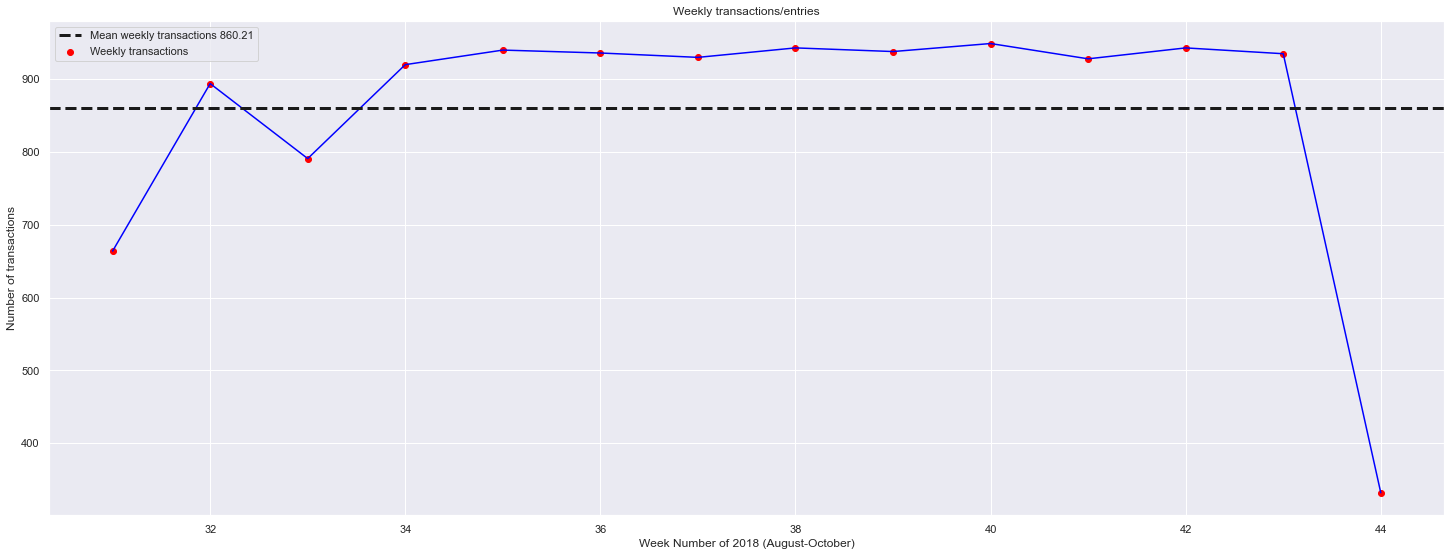

In [77]:
plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
plt.scatter(week_vol.index, week_vol, c='red', label='Weekly transactions')
plt.plot(week_vol.index, week_vol, c='blue')
plt.axhline(week_vol_mean, color='k', linestyle='dashed', linewidth=3, label='Mean weekly transactions'+" "+str(week_vol_mean))
plt.title('Weekly transactions/entries')
plt.xlabel("Week Number of 2018 (August-October)")
plt.ylabel("Number of transactions")
plt.legend()
plt.show()

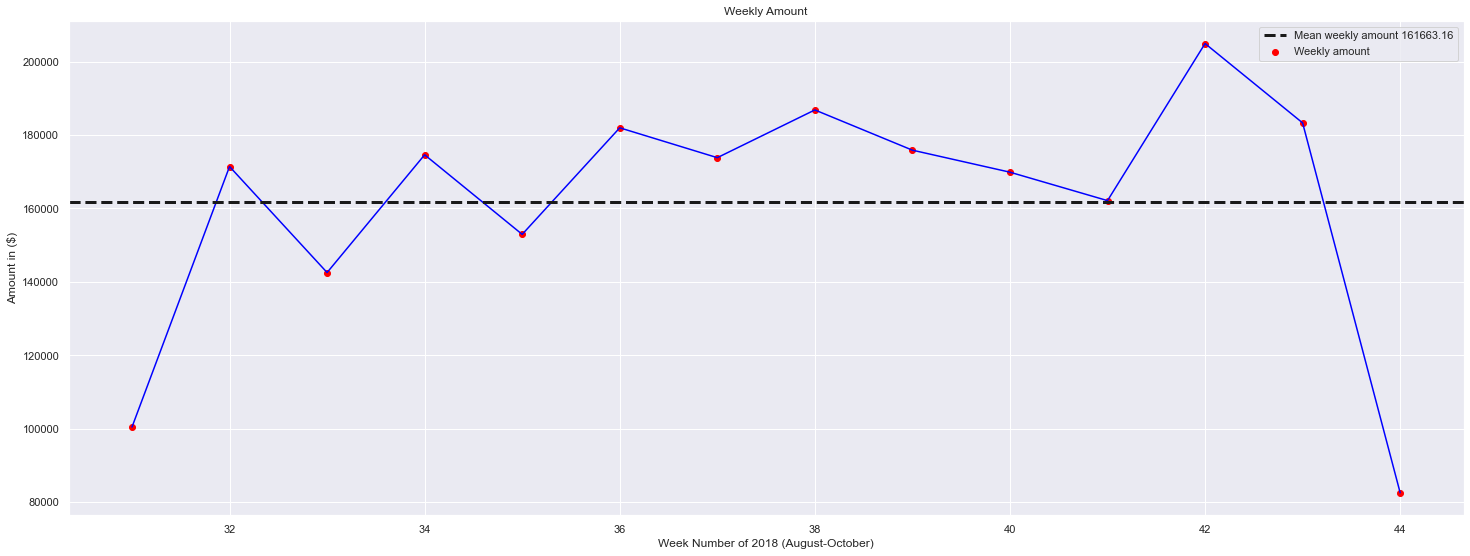

In [78]:
plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
plt.scatter(week_amt.index, week_amt, c='red', label='Weekly amount')
plt.plot(week_amt.index, week_amt, c='blue')
plt.axhline(week_mean, color='k', linestyle='dashed', linewidth=3, label='Mean weekly amount'+" "+str(week_mean))
plt.title('Weekly Amount')
plt.xlabel("Week Number of 2018 (August-October)")
plt.ylabel("Amount in ($)")
plt.legend()
plt.show()

In [81]:
merchant_analyis = df.groupby(['merchant_state','gender']).sum()['amount'].reset_index()
merchant_analyis.head()

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42


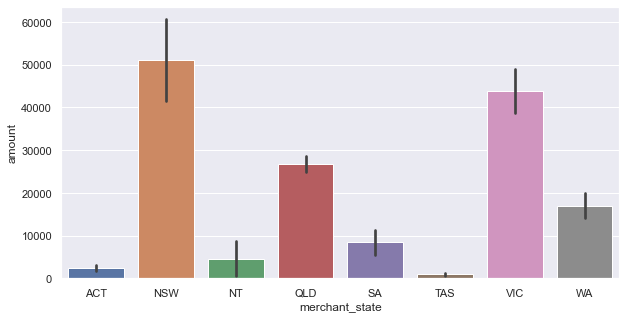

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x='merchant_state', y='amount',data=merchant_analyis)

In [109]:
df_salary = df.loc[df['txn_description'].isin(['PAY/SALARY'])]

In [124]:
df.head()

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month,dom,weekday,year,week_number,weekday_name,month_name
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,153.41,-27.95,153.38,-27.99,01:01:15,8,1,2,2018,31,Wednesday,August
2018-08-01,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95,151.21,-33.87,01:13:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,151.23,-33.94,151.21,-33.87,01:26:15,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66,153.05,-26.68,01:38:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95,153.44,-28.06,01:51:15,8,1,2,2018,31,Wednesday,August


### Daily Transactions and Amount spending

In [127]:
daily = df.groupby(['dom']).count()['transaction_id']
daily_mean = round(daily.mean(),2)
daily_amt = df.groupby(['dom']).sum()['amount']
daily_amt_mean = round(daily_amt.mean(),2)

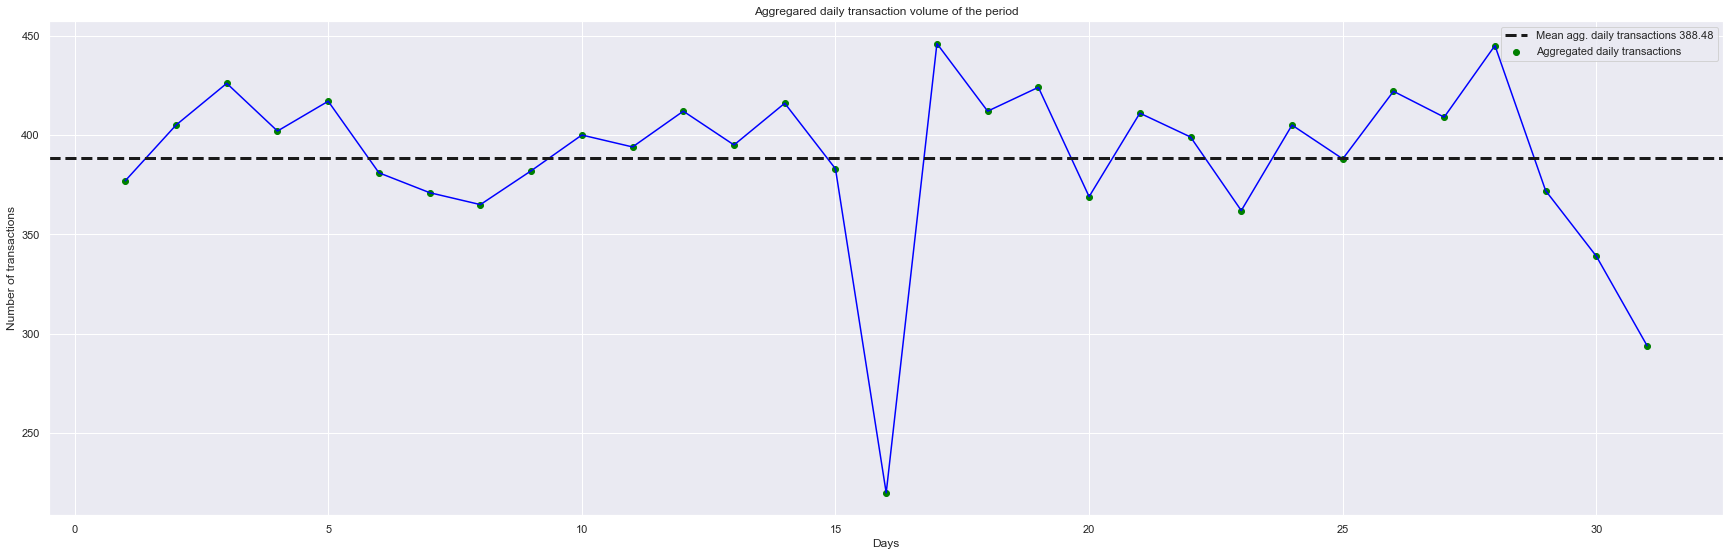

In [136]:
plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
plt.scatter(daily.index, daily, c='green', label='Aggregated daily transactions')
plt.plot(daily.index, daily, c='blue')
plt.axhline(daily_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. daily transactions'+" "+str(daily_mean))
plt.title('Aggregared daily transaction volume of the period')
plt.xlabel("Days")
plt.ylabel("Number of transactions")
plt.legend()
plt.show()


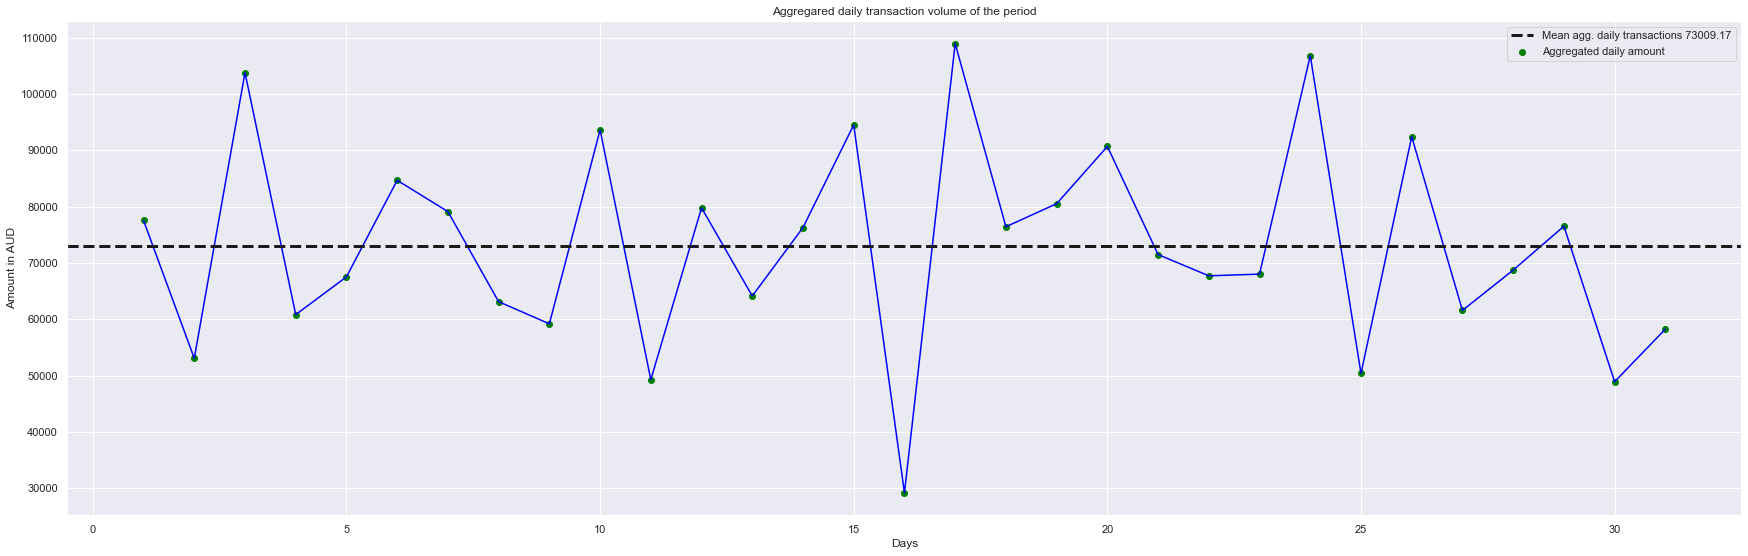

In [138]:
plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
plt.scatter(daily_amt.index, daily_amt, c='green', label='Aggregated daily amount ')
plt.plot(daily_amt.index, daily_amt, c='blue')
plt.axhline(daily_amt_mean, color='k', linestyle='dashed', linewidth=3, label='Mean agg. daily transactions'+" "+str(daily_amt_mean))
plt.title('Aggregared daily transaction volume of the period')
plt.xlabel("Days")
plt.ylabel("Amount in AUD")
plt.legend()
plt.show()

In [139]:
# We can observe there is a steep decrease on 16th with respect to both the plots.
# To check whether the data is missing on 16th

In [142]:
start_date = df['date'][0]
end_date = df['date'][len(df['date'])-1]
numdays = (end_date - start_date).days
all_dates = []
dates_missing = []

for x in range (0, (numdays+1)):
    all_dates.append(start_date + datetime.timedelta(days = x))


for i in range (0, len(all_dates)):
    if (all_dates[i] not in df['date']):
        dates_missing.append(all_dates[i])
    else:
        pass

In [143]:
dates_missing

[Timestamp('2018-08-16 00:00:00')]

### Top 10 customers based on Salary 

In [110]:
df_salary.groupby(['customer_id','first_name','age']).sum()['amount'].sort_values(ascending=False).head()

customer_id     first_name  age
CUS-1816693151  Tim         40     35343.92
CUS-3142625864  Ricky       43     33644.13
CUS-2738291516  Kenneth     35     33081.88
CUS-2155701614  Linda       35     31762.12
CUS-261674136   Kenneth     29     30837.10
Name: amount, dtype: float64

### Analysis with respect to age group of customers and their salary

In [119]:
df_salary.groupby(['age']).sum()['amount'].sort_values(ascending=False).head()


age
40    131403.46
19    115785.36
21    107137.60
38    102155.48
35     98618.21
Name: amount, dtype: float64

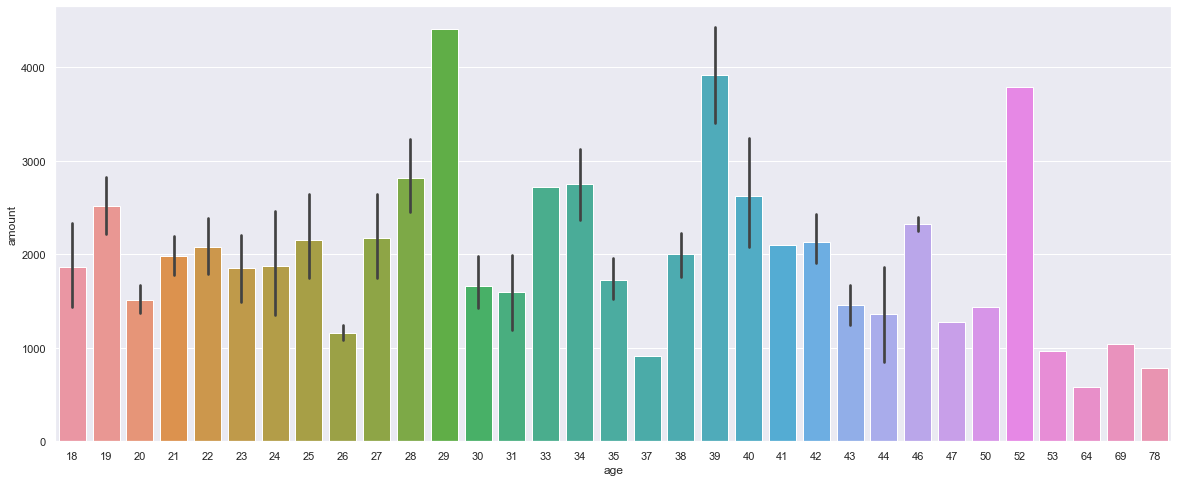

In [120]:
df_salary_analysis = df_salary
plt.figure(figsize=(20, 8))
sns.barplot(y="amount", x="age",data=df_salary_analysis)

In [94]:
df_merchant = df.loc[df['txn_description'].isin(['Pos','SALES-POS'])]
df_merchant

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month,dom,weekday,year,week_number,weekday_name,month_name
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95,151.21,-33.87,01:13:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66,153.05,-26.68,01:38:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95,153.44,-28.06,01:51:15,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-2776252858,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01 02:23:04+00:00,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,debit,144.95,-37.76,144.95,-37.53,02:23:04,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-182446574,SALES-POS,33952b07-859c-4c0a-8b1d-813a5f6b444c,Tonya,207.08,2018-08-01,F,27,Cockburn Central,WA,2018-08-01 06:06:40+00:00,6.08,9ba4928260b24fbb8fb00f1f8d86b868,Australia,CUS-3026014945,debit,116.06,-32.00,115.86,-32.13,06:06:40,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-3481401842,SALES-POS,38997041-c666-41a4-857b-9aaea10c008d,Tiffany,259.37,2018-08-01,F,25,Fremantle,WA,2018-08-01 08:28:45+00:00,13.67,daae532bc1114fbd86fca277f349a397,Australia,CUS-1669695324,debit,115.74,-31.72,115.76,-32.06,08:28:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1710017148,SALES-POS,8a0fab50-4efb-41e2-a569-29346eb6c9de,Michelle,1636.91,2018-08-01,F,19,Granville,NSW,2018-08-01 09:02:54+00:00,17.96,455044b17a8648a2945d7c39e8274351,Australia,CUS-883482547,debit,150.82,-34.01,151,-33.83,09:02:54,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-2673069055,SALES-POS,73b8eb5f-d6e6-43fb-896a-84faa162d544,Richard,11525.54,2018-08-01,M,24,Pacific Paradise,QLD,2018-08-01 09:06:57+00:00,14.49,221c4f7dd53240a18ceab43e1b879a62,Australia,CUS-51506836,debit,152.99,-27.49,153.08,-26.61,09:06:57,8,1,2,2018,31,Wednesday,August
2018-08-01,0.0,ACC-1710017148,SALES-POS,4af25042-a1a4-4688-90b5-240d790e5332,Michelle,1625.34,2018-08-01,F,19,Alexandria,NSW,2018-08-01 09:11:00+00:00,11.57,82acf03790844776b4587fd6e6f526c5,Australia,CUS-883482547,debit,150.82,-34.01,151.19,-33.92,09:11:00,8,1,2,2018,31,Wednesday,August


### Top 10 suburbs customer spending amount 

In [95]:
df_merchant.groupby(['merchant_suburb', 'merchant_state']).sum()['amount'].sort_values(ascending=False).head(10)

merchant_suburb  merchant_state
Sydney           NSW               11923.00
Melbourne        VIC                8358.63
Mascot           NSW                7470.73
Malvern          VIC                3148.33
Parap            NT                 2619.33
Maribyrnong      VIC                2056.33
Abbotsford       VIC                1922.26
Mount Gambier    SA                 1906.05
Newtown          NSW                1843.36
Keilor Park      VIC                1838.11
Name: amount, dtype: float64

### Top 10 customers by name who spent highest amount

In [96]:
df_merchant.groupby(['customer_id', 'first_name', 'age']).sum()['amount'].sort_values(ascending=False).head()

customer_id     first_name  age
CUS-2738291516  Kenneth     35     5768.52
CUS-325142416   Jessica     21     5020.71
CUS-2487424745  Diana       26     4988.24
CUS-4142663097  Sandra      34     4556.75
CUS-4023861240  James       28     3622.27
Name: amount, dtype: float64

### Top 10 Merchant with most sales

In [121]:
df_merchant.groupby(['merchant_id','merchant_suburb']).sum()['amount'].sort_values(ascending=False).head()

merchant_id                           merchant_suburb
e5b2b589-812a-44a1-a1bb-403d9ee9a1b4  Mascot             7118.85
28d6a5ac-52c7-42f0-96ee-80140a350d8d  Melbourne          3680.71
5689d17d-5202-4ad5-9333-2505f051c5dd  Parap              2567.93
722430c6-39e6-4570-9323-3db6191e6548  Malvern            2541.95
21e5f1e5-92db-46b6-bf42-2039fd9cc52a  Abbotsford         1909.04
Name: amount, dtype: float64

In [146]:
df_merchant.head()

,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,customer_long,customer_lat,merchant_long,merchant_lat,time,Month,dom,weekday,year,week_number,weekday_name,month_name
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,153.41,-27.95,151.21,-33.87,01:13:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,153.10,-27.66,153.05,-26.68,01:38:45,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,153.41,-27.95,153.44,-28.06,01:51:15,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-2776252858,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01 02:23:04+00:00,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,debit,144.95,-37.76,144.95,-37.53,02:23:04,8,1,2,2018,31,Wednesday,August
2018-08-01,1.0,ACC-182446574,SALES-POS,33952b07-859c-4c0a-8b1d-813a5f6b444c,Tonya,207.08,2018-08-01,F,27,Cockburn Central,WA,2018-08-01 06:06:40+00:00,6.08,9ba4928260b24fbb8fb00f1f8d86b868,Australia,CUS-3026014945,debit,116.06,-32.00,115.86,-32.13,06:06:40,8,1,2,2018,31,Wednesday,August


### MAP View

In [89]:
import folium
from folium.plugins import BeautifyIcon

In [152]:
# To Display all the merchant locations

In [147]:
def plot_map(cust_list):
    i, j = cust_list
    j = j.lower()
    j = pd.DataFrame(df_merchant[df_merchant['customer_id']==i])
    

    m = folium.Map([-31, 133], zoom_start=5)
    for index, row in j.iterrows():

        icon_circle = BeautifyIcon(
        icon_shape='circle-dot', 
        border_color='#FF5050', 
        border_width=6,
        )

        folium.Marker([row['merchant_lat'], row['merchant_long']],
                    tooltip=[row['merchant_suburb'],str(row['extraction'])],
                    icon= icon_circle).add_to(m)

        
        folium.Marker([row['customer_lat'], row['customer_long']],
                      popup=row['first_name'],
                      tooltip=row['first_name']).add_to(m)

    return m

In [150]:
# Top 5 with most pos and transactions
pos_cust_id = df_merchant.groupby(['customer_id','first_name']).count()['transaction_id'].sort_values(ascending=False).head(5).index.to_list()

In [151]:
plot_map(pos_cust_id[1])